# Forecasting Stock Perfomance with Prophet

<p><img src="https://picsum.photos/1200/200/?image=357" class="img-fluid" alt="Responsive image" /></p>

In this post we will be using [Prophet](https://facebook.github.io/prophet/) to forecast time series data.
Sections:
* [Imports](#Imports)
* [Data Preparation](#Data-Preparation)
* [Prophet](#Prophet)

In [1]:
pip install pystan

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install prophet

In [3]:
import holidays

In [4]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [5]:
from prophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing plotly failed. Interactive plots will not work.


In [6]:
stock_price =  pd.read_csv(r'C:\Users\91979\Downloads\MLoct23\BALRAMCHIN.NS (1).csv')

In [7]:
stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       157 non-null    object 
 1   Open       157 non-null    float64
 2   High       157 non-null    float64
 3   Low        157 non-null    float64
 4   Close      157 non-null    float64
 5   Adj Close  157 non-null    float64
 6   Volume     157 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 8.7+ KB


In [8]:
stock_price.describe()

,Open,High,Low,Close,Adj Close,Volume
count,157.000000,157.000000,157.000000,157.000000,157.000000,1.570000e+02
mean,276.953503,291.266561,263.363376,277.468790,273.863048,1.067946e+07
std,117.619839,122.514941,112.472720,117.580155,117.723063,8.292588e+06
min,73.000000,96.000000,68.949997,72.750000,70.725060,1.911641e+06
25%,160.000000,167.500000,153.500000,159.350006,154.914612,4.946046e+06
50%,327.299988,340.000000,303.200012,326.950012,322.928680,8.717741e+06
75%,365.250000,382.750000,350.600006,368.549988,365.348328,1.340760e+07
max,502.799988,525.900024,489.850006,502.950012,499.597473,5.642260e+07


## Data Preparation

In [9]:
stock_price = stock_price[['Date','Adj Close']]

In [10]:
stock_price.columns = ['ds', 'y']
stock_price.head(10)

,ds,y
0,2020-01-01,181.017242
1,2020-01-08,185.100357
2,2020-01-15,178.392426
3,2020-01-22,162.740540
4,2020-01-29,152.775833
5,2020-02-05,154.671585
6,2020-02-12,158.706055
7,2020-02-19,154.914612
8,2020-02-26,138.873886
9,2020-03-04,119.722206


In [11]:
stock_price.tail(10)

,ds,y
147,2022-10-26,328.445953
148,2022-11-02,330.184296
149,2022-11-09,345.233307
150,2022-11-16,356.010986
151,2022-11-23,378.857666
152,2022-11-30,378.311340
153,2022-12-07,366.093323
154,2022-12-14,403.641357
155,2022-12-21,393.757690
156,2022-12-28,394.105347


For prophet to work, we need to change the names of the 'Date' and 'Adj Close' columns to 'ds' and 'y'.  The term 'y' is typically used for the target column (what you are trying to predict) in most machine learning projects.

## Prophet

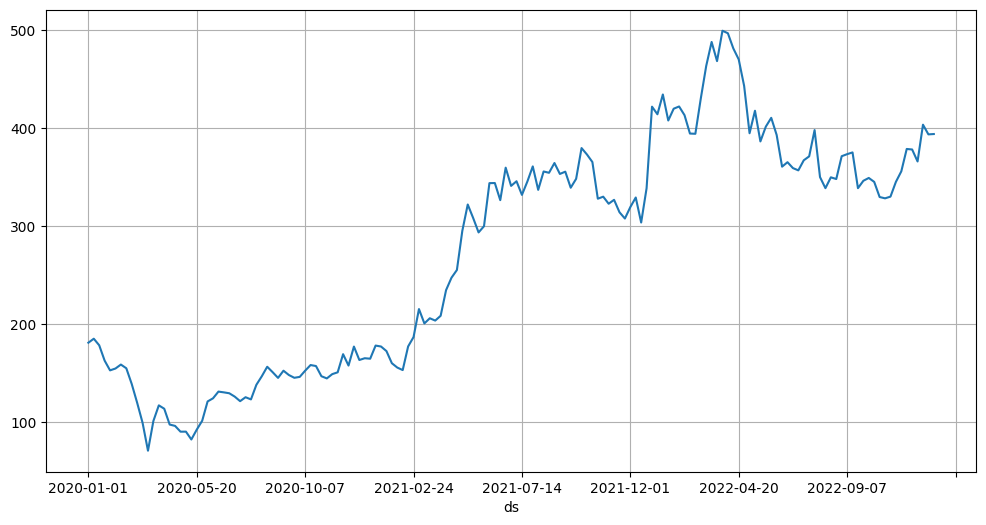

In [12]:
stock_price.set_index('ds').y.plot(figsize=(12,6), grid=True);

In [13]:
# Initialize the Model
model=Prophet()

In [14]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 '_logistic_uncertainty',
 '_make_historical_mat_time',
 '_make_trend_shift_matrix',
 '_sample_uncertainty',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'p

In [15]:
stock_price.columns

Index(['ds', 'y'], dtype='object')

In [16]:
model.fit(stock_price)

12:09:56 - cmdstanpy - INFO - Chain [1] start processing


12:09:56 - cmdstanpy - INFO - Chain [1] done processing


In [17]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [18]:
### Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=365)

In [19]:
future_dates.tail()

,ds
517,2023-12-24
518,2023-12-25
519,2023-12-26
520,2023-12-27
521,2023-12-28


In [42]:
prediction = model.predict(future_dates)

In [43]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-01,84.812167,61.316388,151.513938,84.812167,84.812167,21.925038,21.925038,21.925038,21.925038,21.925038,21.925038,0.0,0.0,0.0,106.737205
1,2020-01-08,86.654759,82.833100,167.590882,86.654759,86.654759,36.657303,36.657303,36.657303,36.657303,36.657303,36.657303,0.0,0.0,0.0,123.312062
2,2020-01-15,88.497351,80.965573,171.565078,88.497351,88.497351,36.292508,36.292508,36.292508,36.292508,36.292508,36.292508,0.0,0.0,0.0,124.789859
3,2020-01-22,90.339944,70.707910,157.976053,90.339944,90.339944,24.686711,24.686711,24.686711,24.686711,24.686711,24.686711,0.0,0.0,0.0,115.026655
4,2020-01-29,92.182536,60.378237,149.119444,92.182536,92.182536,11.519793,11.519793,11.519793,11.519793,11.519793,11.519793,0.0,0.0,0.0,103.702329


In [44]:
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
517,2023-12-24,379.322116,317.065476,433.187997,342.455535,414.983393,-5.471603,-5.471603,-5.471603,-5.471603,-5.471603,-5.471603,0.0,0.0,0.0,373.850512
518,2023-12-25,379.297416,317.476197,436.581067,342.066248,415.073941,-1.989127,-1.989127,-1.989127,-1.989127,-1.989127,-1.989127,0.0,0.0,0.0,377.308289
519,2023-12-26,379.272717,322.861881,437.173115,341.697245,415.184402,1.552853,1.552853,1.552853,1.552853,1.552853,1.552853,0.0,0.0,0.0,380.825569
520,2023-12-27,379.248017,325.217929,446.828584,341.522660,415.294862,5.116674,5.116674,5.116674,5.116674,5.116674,5.116674,0.0,0.0,0.0,384.364691
521,2023-12-28,379.223318,326.779305,444.592061,341.363761,415.405323,8.663867,8.663867,8.663867,8.663867,8.663867,8.663867,0.0,0.0,0.0,387.887184


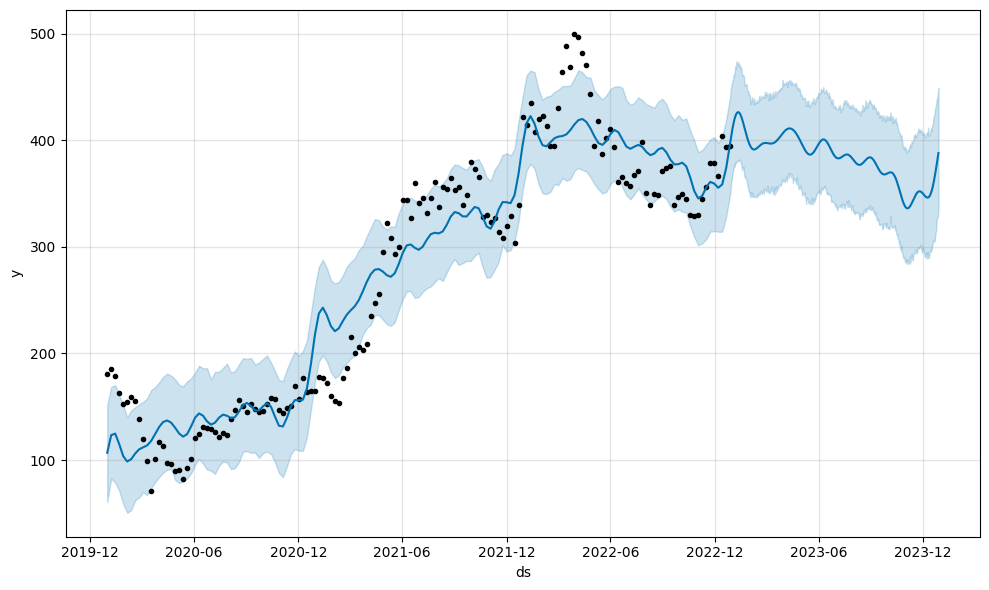

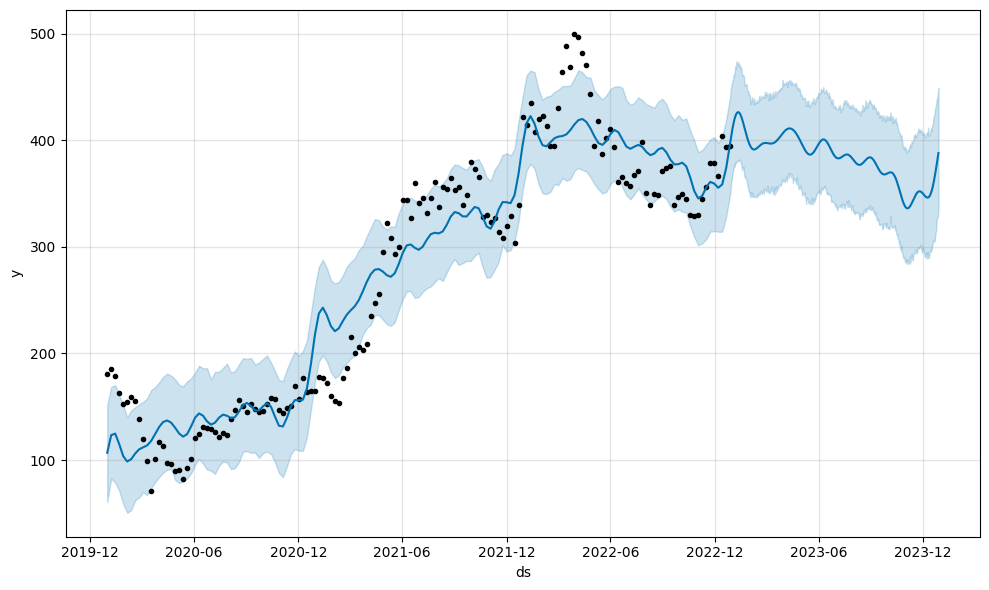

In [23]:
### plot the predicted projection
model.plot(prediction)

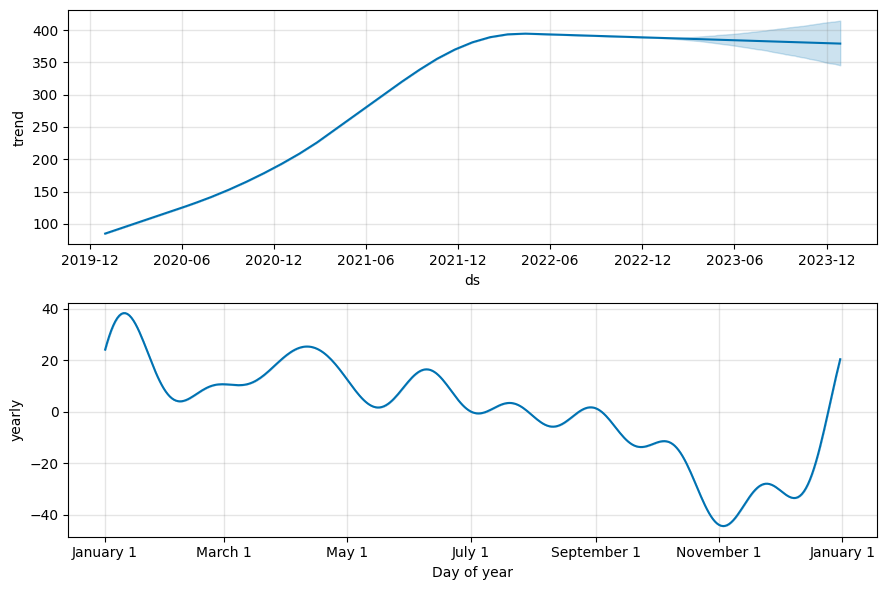

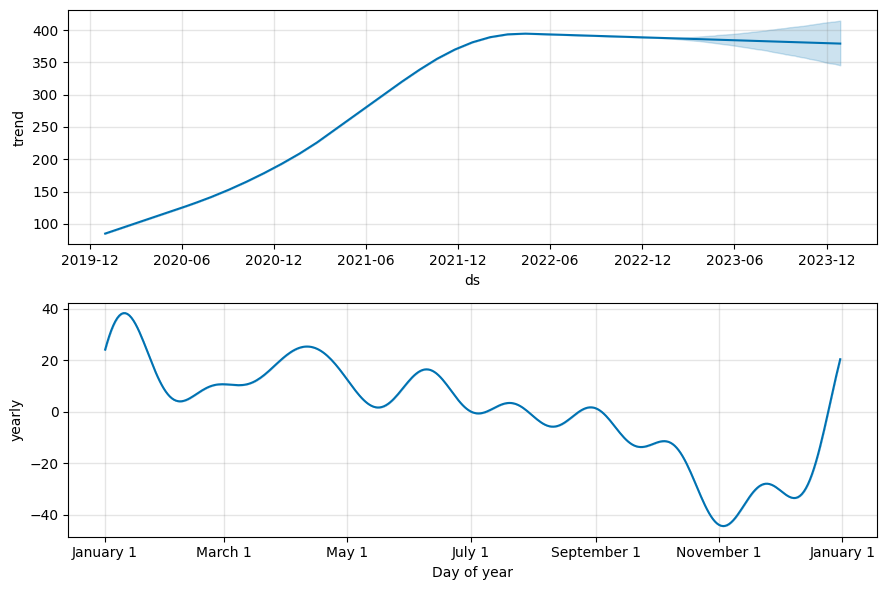

In [24]:
model.plot_components(prediction)

In [36]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='700 days', period='180 days', horizon = '365days')
df_cv.head()

  0%|          | 0/1 [00:00<?, ?it/s]

12:35:50 - cmdstanpy - INFO - Chain [1] start processing
12:35:50 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-12-29,334.605075,319.259850,351.110069,422.044434,2021-12-28
1,2022-01-05,341.900659,325.439377,358.914947,414.291016,2021-12-28
2,2022-01-12,345.573324,329.452168,361.254432,434.489441,2021-12-28
3,2022-01-19,340.761407,323.986733,356.135073,407.920349,2021-12-28
4,2022-01-26,331.000012,314.550758,348.180175,419.970276,2021-12-28


In [37]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,29 days,6643.622499,81.508420,80.975008,0.192609,0.204645,0.213382,0.0
1,36 days,6960.283268,83.428312,82.700616,0.196676,0.204645,0.218501,0.0
2,43 days,7219.912373,84.970068,84.394754,0.200854,0.204645,0.223576,0.0
3,50 days,6125.231398,78.263858,76.475954,0.184924,0.195622,0.204646,0.0
4,57 days,5560.840047,74.571040,71.262114,0.172835,0.195622,0.190749,0.0


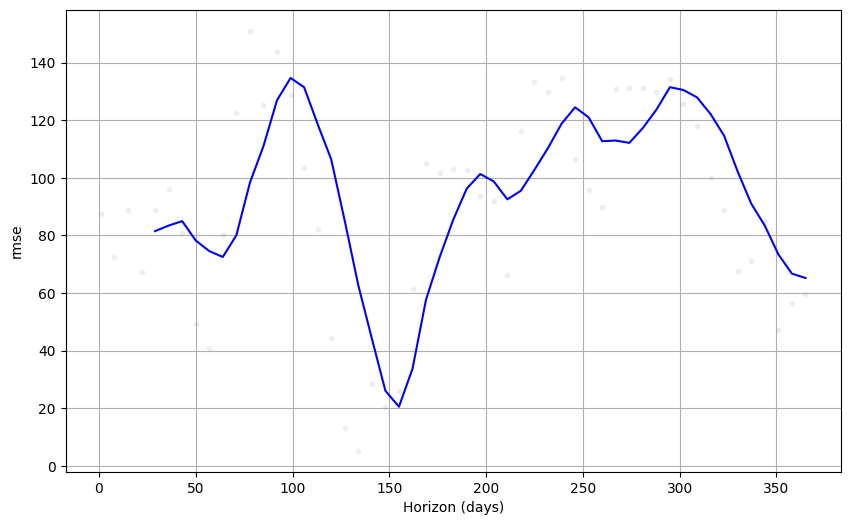

In [27]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

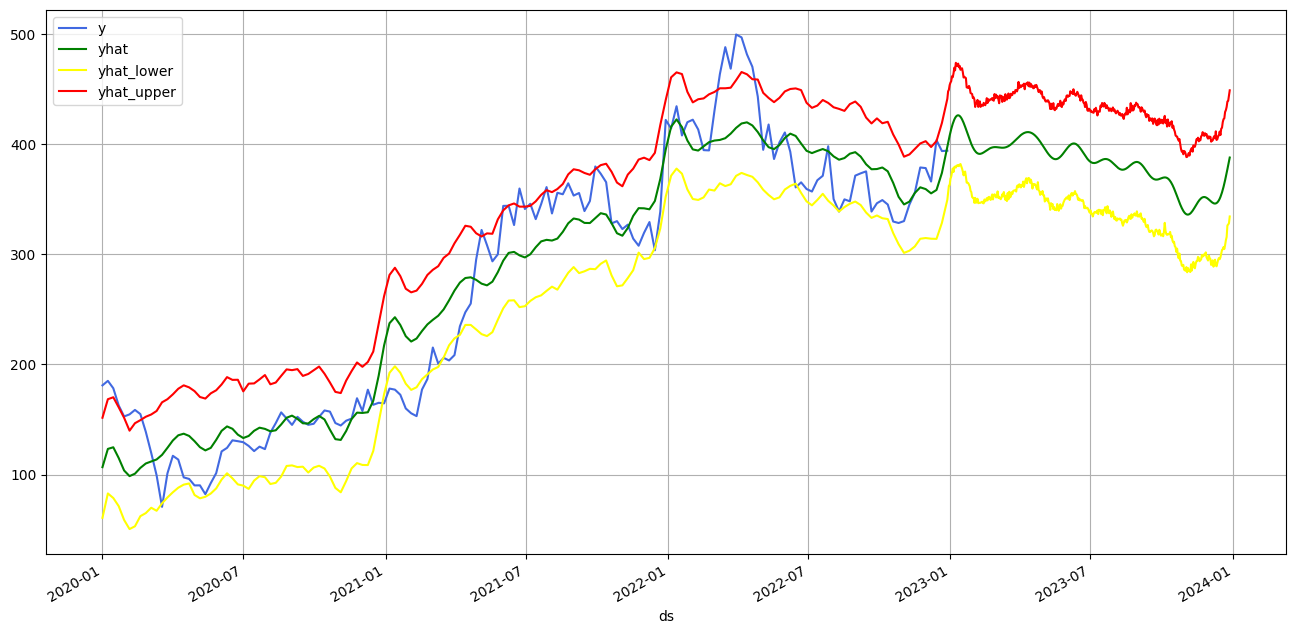

In [38]:
stock_price_forecast = prediction[['ds', 'yhat','yhat_lower','yhat_upper']]
df = pd.merge(stock_price, stock_price_forecast, on='ds', how='right')
df.set_index('ds').plot(figsize=(16,8), color=['royalblue', "green", "yellow", "red"], grid=True);

In [39]:
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,29 days,6643.622499,81.508420,80.975008,0.192609,0.204645,0.213382,0.0
1,36 days,6960.283268,83.428312,82.700616,0.196676,0.204645,0.218501,0.0
2,43 days,7219.912373,84.970068,84.394754,0.200854,0.204645,0.223576,0.0
3,50 days,6125.231398,78.263858,76.475954,0.184924,0.195622,0.204646,0.0
4,57 days,5560.840047,74.571040,71.262114,0.172835,0.195622,0.190749,0.0


In [40]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-12-29,334.605075,319.259850,351.110069,422.044434,2021-12-28
1,2022-01-05,341.900659,325.439377,358.914947,414.291016,2021-12-28
2,2022-01-12,345.573324,329.452168,361.254432,434.489441,2021-12-28
3,2022-01-19,340.761407,323.986733,356.135073,407.920349,2021-12-28
4,2022-01-26,331.000012,314.550758,348.180175,419.970276,2021-12-28


In [41]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
48,2022-11-30,449.367453,360.512862,531.985205,378.311340,2021-12-28
49,2022-12-07,451.132716,363.396478,534.562067,366.093323,2021-12-28
50,2022-12-14,450.685921,360.201103,540.178955,403.641357,2021-12-28
51,2022-12-21,450.377394,352.529706,543.146450,393.757690,2021-12-28
52,2022-12-28,453.941770,357.304661,548.034168,394.105347,2021-12-28


In [45]:
# Create a dictionary to save both the model and prediction data
model_and_prediction = {
    'model': model,
    'prediction': prediction,
}

In [46]:


# Define the file name for the pickle file
pickle_filename = "prophet_model_and_prediction.pkl"

In [48]:
import pickle

In [49]:
# Save the dictionary to the pickle file
with open(pickle_filename, "wb") as pickle_file:
    pickle.dump(model_and_prediction, pickle_file)

In [59]:
# Load the model and prediction data from the pickle file
with open(pickle_filename, "rb") as pickle_file:
    loaded_data = pickle.load(pickle_file)

# Access the loaded model from the dictionary
loaded_model = loaded_data['model']

# Create a DataFrame with future dates for prediction
future_dates_for_prediction = loaded_model.make_future_dataframe(periods=365)

# Use the loaded model to make predictions
predictions = loaded_model.predict(future_dates_for_prediction)


In [60]:
predictions.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-01,84.812167,60.063754,146.488942,84.812167,84.812167,21.925038,21.925038,21.925038,21.925038,21.925038,21.925038,0.0,0.0,0.0,106.737205
1,2020-01-08,86.654759,79.521399,169.079301,86.654759,86.654759,36.657303,36.657303,36.657303,36.657303,36.657303,36.657303,0.0,0.0,0.0,123.312062
2,2020-01-15,88.497351,80.787223,168.677963,88.497351,88.497351,36.292508,36.292508,36.292508,36.292508,36.292508,36.292508,0.0,0.0,0.0,124.789859
3,2020-01-22,90.339944,72.785037,159.208357,90.339944,90.339944,24.686711,24.686711,24.686711,24.686711,24.686711,24.686711,0.0,0.0,0.0,115.026655
4,2020-01-29,92.182536,60.681065,147.476734,92.182536,92.182536,11.519793,11.519793,11.519793,11.519793,11.519793,11.519793,0.0,0.0,0.0,103.702329


In [61]:
predictions.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
517,2023-12-24,379.322116,310.824429,426.784931,342.186237,412.778098,-5.471603,-5.471603,-5.471603,-5.471603,-5.471603,-5.471603,0.0,0.0,0.0,373.850512
518,2023-12-25,379.297416,319.633813,433.737252,342.033929,412.845901,-1.989127,-1.989127,-1.989127,-1.989127,-1.989127,-1.989127,0.0,0.0,0.0,377.308289
519,2023-12-26,379.272717,321.345618,434.950168,341.865334,412.898453,1.552853,1.552853,1.552853,1.552853,1.552853,1.552853,0.0,0.0,0.0,380.825569
520,2023-12-27,379.248017,322.241861,445.492714,341.646759,413.045246,5.116674,5.116674,5.116674,5.116674,5.116674,5.116674,0.0,0.0,0.0,384.364691
521,2023-12-28,379.223318,327.973701,445.464990,341.428184,413.173662,8.663867,8.663867,8.663867,8.663867,8.663867,8.663867,0.0,0.0,0.0,387.887184


In [65]:
# Assuming predictions is your DataFrame containing Prophet predictions
desired_date = '2023-10-04'  # The date you want to check

# Filter the predictions DataFrame for the desired date
prediction_for_desired_date = predictions[predictions['ds'] == desired_date]

# Access the 'yhat' value for the desired date
yhat_value = prediction_for_desired_date['yhat'].values[0]

# Print the yhat value
print(f"The yhat value for {desired_date} is: {yhat_value}")


The yhat value for 2023-10-04 is: 369.7746499311265
